In [1]:
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './arpeggio_int.csv'
df = pd.read_csv(path).fillna(0)

In [3]:
df['name'] = [i.split('_')[0].upper() for i in df['ID']]
df['type'] = [i.split('_')[-1].capitalize() for i in df['ID']]
df = df.replace({'Cryoem': 'Cryo-EM', 'Qty': 'QTY'})
d_order = {'Cryo-EM': 2, 'Native': 1, 'QTY': 0}
df['order'] = [d_order[t] for t in df['type']]
df = df.sort_values(by = ['name', 'order'])

In [4]:
df

,ID,proximal,hydrophobic,vdw,weak_polar,hbond,polar,vdw_clash,weak_hbond,covalent,...,distance,OF,CATIONPI,OE,ET,EE,FF,name,type,order
21,KCNA1_Q09470_qty,9359,195,195,242,379,622,342,150,0.0,...,4.273536,1.0,0.0,1.0,3.0,1.0,0.0,KCNA1,QTY,0
25,KCNA1_Q09470_native,9290,372,227,269,326,570,305,169,0.0,...,4.280060,0.0,0.0,1.0,3.0,1.0,0.0,KCNA1,Native,1
34,KCNA3_P22001_qty,13319,558,255,347,466,732,471,234,0.0,...,4.289537,1.0,1.0,5.0,3.0,1.0,1.0,KCNA3,QTY,0
35,KCNA3_P22001_native,13104,716,293,379,429,694,414,230,0.0,...,4.288800,2.0,2.0,6.0,3.0,2.0,1.0,KCNA3,Native,1
36,KCNA3_P22001_7EJ1_cryoem,10697,505,265,309,310,462,293,178,0.0,...,4.301428,2.0,3.0,4.0,6.0,0.0,1.0,KCNA3,Cryo-EM,2
29,KCNA5_P22460_qty,9844,216,235,277,387,644,394,154,0.0,...,4.264697,1.0,0.0,2.0,0.0,1.0,0.0,KCNA5,QTY,0
32,KCNA5_P22460_native,9626,384,216,290,341,581,348,174,0.0,...,4.269794,0.0,0.0,1.0,1.0,1.0,0.0,KCNA5,Native,1
24,KCNC4_Q03721_qty,9426,259,209,224,349,582,337,146,0.0,...,4.280153,3.0,0.0,1.0,1.0,1.0,1.0,KCNC4,QTY,0
28,KCNC4_Q03721_native,9035,455,212,254,320,528,334,161,0.0,...,4.279105,2.0,0.0,1.0,1.0,1.0,1.0,KCNC4,Native,1
12,KCND1_Q9NSA2_qty,8314,229,187,223,320,532,303,136,1.0,...,4.277300,2.0,0.0,1.0,1.0,3.0,0.0,KCND1,QTY,0


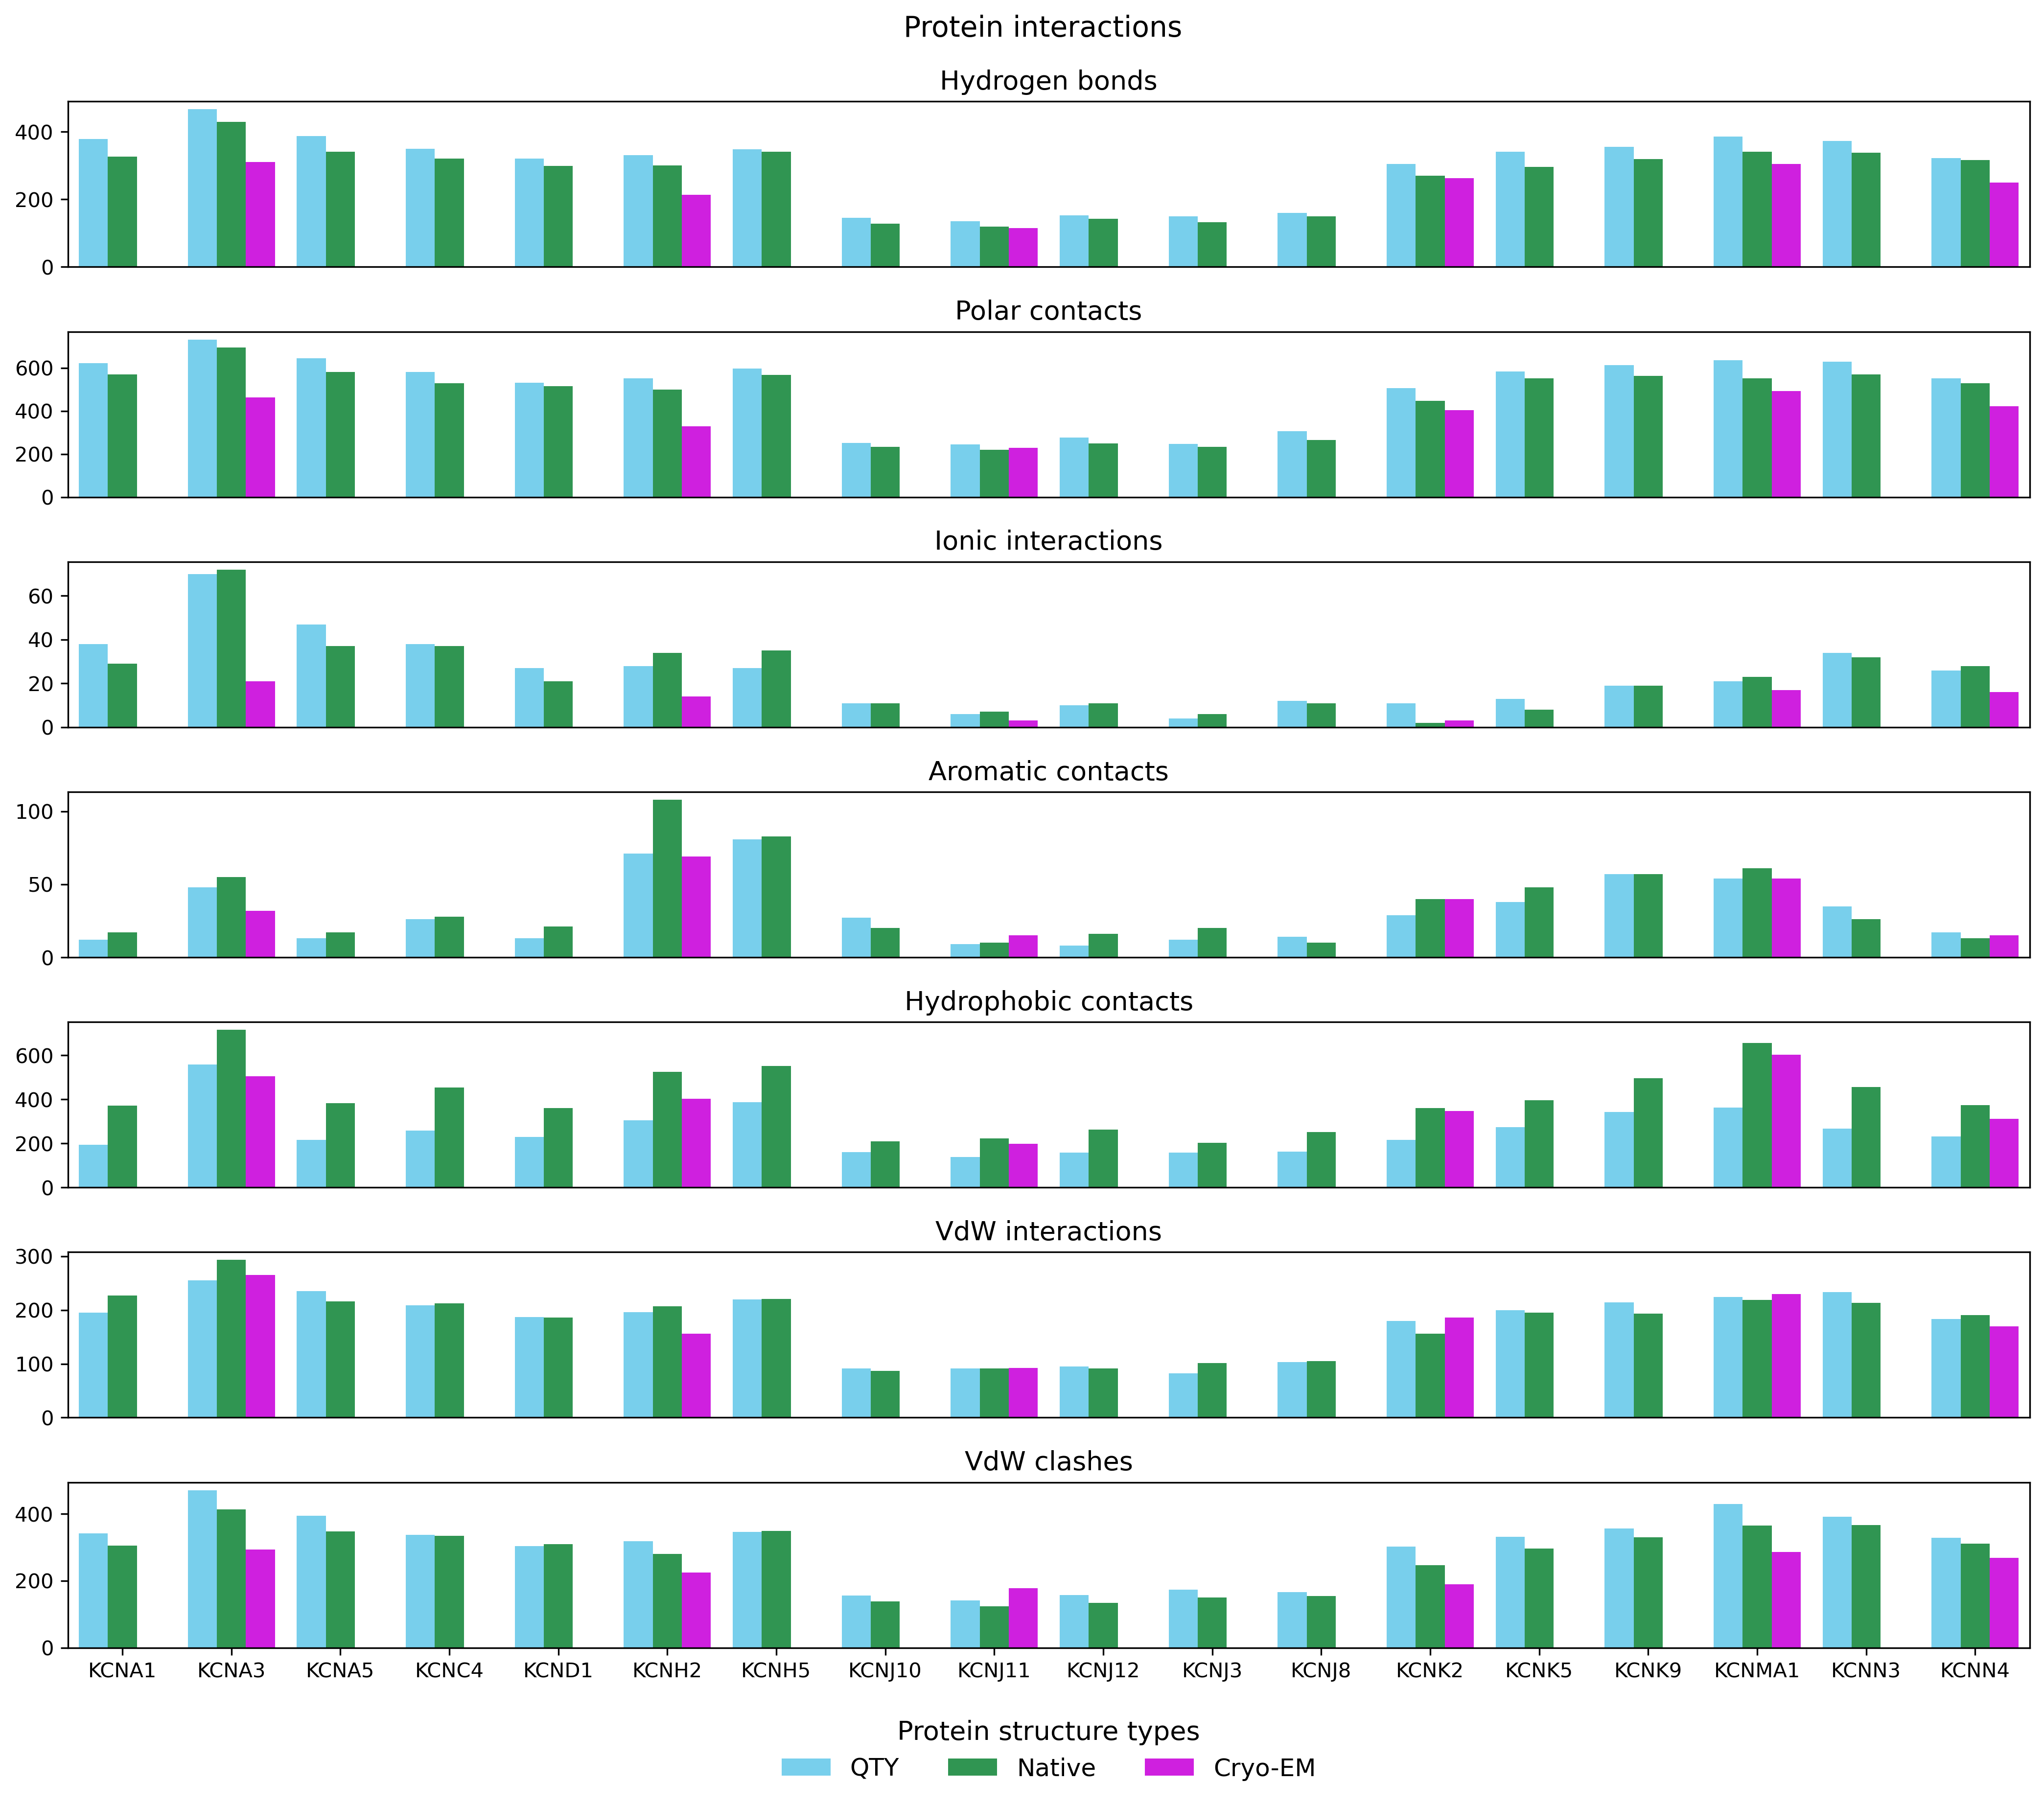

In [5]:
fig, axs = plt.subplots(nrows = 7, ncols = 1, figsize = (14, 12), dpi = 300)
axs = axs.flatten()

colors = ['#65D9FF', '#1FA64D', '#EA00FF'] #  Native, QTY, Cryo-EM
sns.set_palette(sns.color_palette(colors))

parameters = ['hbond', 'polar', 'ionic', 'aromatic', 'hydrophobic', 'vdw', 'vdw_clash']
labels = ['Hydrogen bonds', 'Polar contacts', 'Ionic interactions', 'Aromatic contacts', 
          'Hydrophobic contacts', 'VdW interactions', 'VdW clashes']

for n, column in enumerate(parameters):
    sns.barplot(data = df, x = 'name', y = column, hue = 'type', ax = axs[n])
    axs[n].set_ylabel('')
    axs[n].set_xlabel('')
    axs[n].get_legend().remove()
    axs[n].set_title(f'{labels[n]}', fontsize = 13)
    if not n == len(parameters) - 1:
        axs[n].set_xticks([])    

legend = axs[n].legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.3), frameon = False, 
                       fancybox = False, shadow = False, ncol = 3, fontsize = 12)
legend.set_title('Protein structure types', prop = {'size': 13})
    
#fig.text(0.5, -0.01, 'Proteins', ha='center', fontsize = 12)
#fig.text(-0.01, 0.5, 'Interactions', va='center', rotation='vertical', fontsize = 12)
fig.text(0.51, 1.007, 'Protein interactions', ha='center', fontsize = 14)
    
plt.tight_layout(pad = 1)
#plt.show()
plt.savefig('./kcn_int_bar.png')

In [6]:
parameters = ['hbond', 'polar', 'ionic', 'aromatic', 'hydrophobic', 'vdw', 'vdw_clash']
labels = ['Hydrogen bonds', 'Polar contacts', 'Ionic interactions', 'Aromatic contacts', 
          'Hydrophobic contacts', 'VdW interactions', 'VdW clashes']

types = ['Native', 'Cryo-EM', 'QTY']
kw = {k: [] for k in parameters}

df = df.fillna(0)
for n, column in enumerate(parameters):
    groups = [df[df['type'] == t][column].values for t in types]
        
    kw_native_qty = stats.kruskal(groups[0], groups[2])
    kw_native_cryoem = stats.kruskal(groups[0], groups[1])
    kw_qty_cryoem = stats.kruskal(groups[2], groups[1])
    kw_native_cryoem_qty = stats.kruskal(groups[0], groups[1], groups[2])
    
    kw[column].extend([kw_native_qty.pvalue, kw_native_cryoem.pvalue, kw_qty_cryoem.pvalue, kw_native_cryoem_qty.pvalue])

In [7]:
pairs = [('Native', 'QTY'), ('Native', 'Cryo-EM'), ('Cryo-EM', 'QTY'), ('Native', 'Cryo-EM', 'QTY')]
df_kw = pd.DataFrame(kw.values(), columns = pairs)
df_kw['parameters'] = kw.keys()

In [8]:
df_kw

,"(Native, QTY)","(Native, Cryo-EM)","(Cryo-EM, QTY)","(Native, Cryo-EM, QTY)",parameters
0,0.073751,0.161149,0.066694,0.058497,hbond
1,0.106531,0.082903,0.053195,0.051173,polar
2,0.812100,0.133023,0.102026,0.232829,ionic
3,0.516224,0.815305,0.333290,0.631616,aromatic
4,0.002645,0.841447,0.027739,0.005010,hydrophobic
5,0.911764,0.946812,0.946836,0.992545,vdw
6,0.268142,0.205275,0.109599,0.180225,vdw_clash


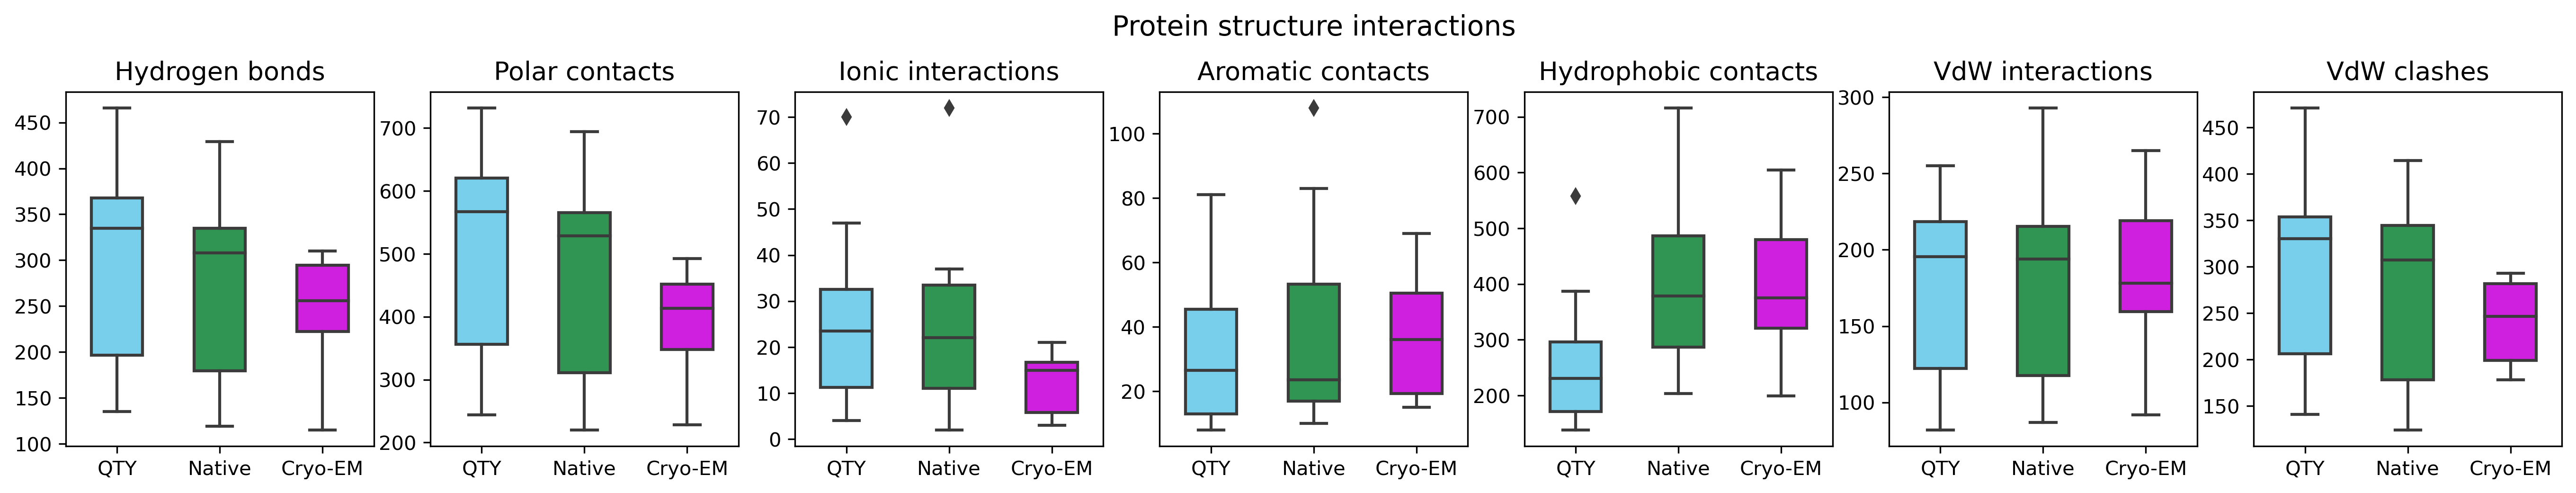

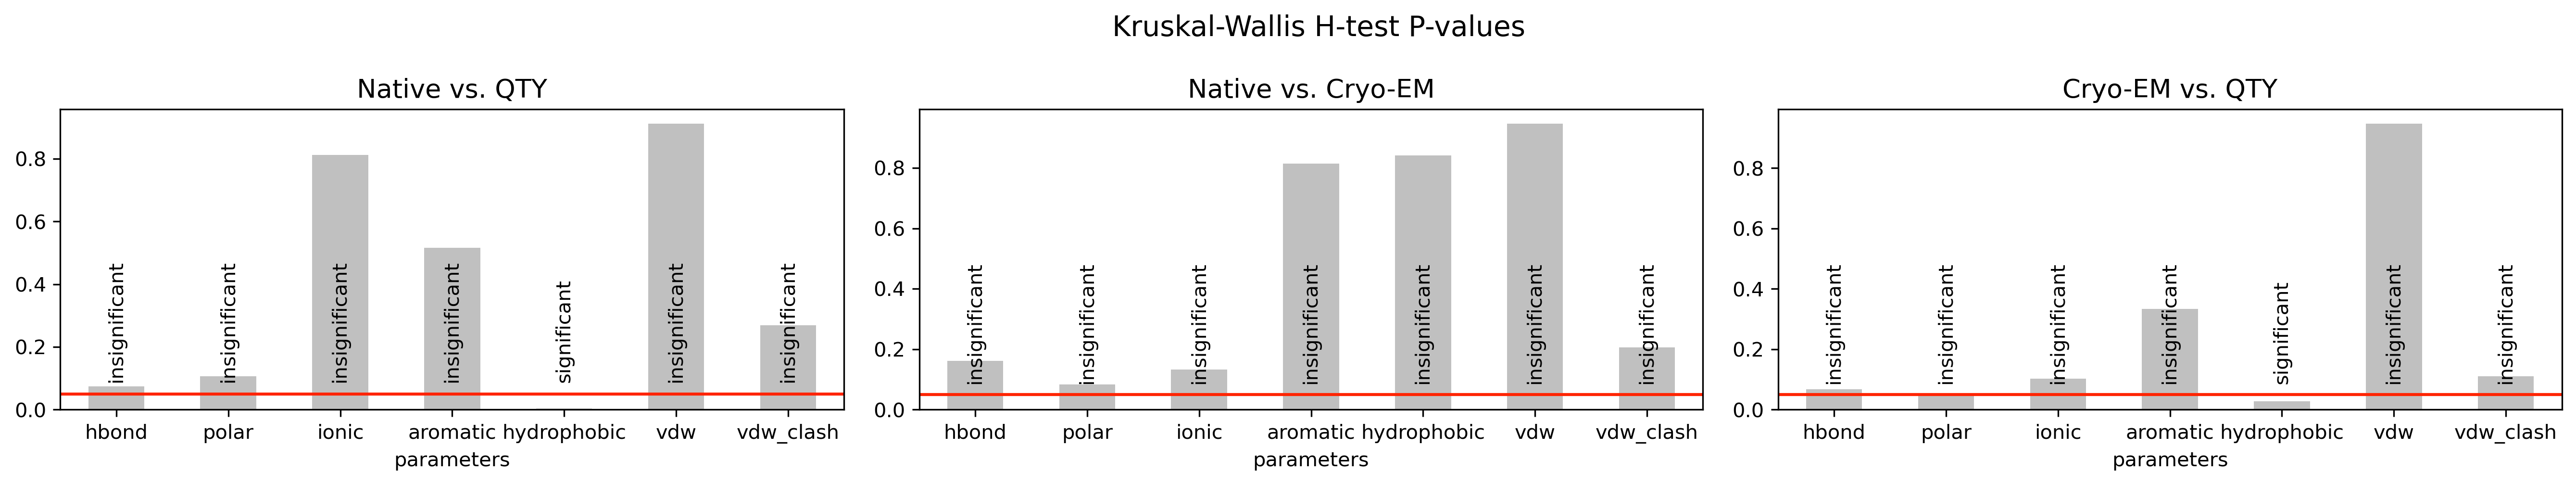

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (18, 3), dpi = 300)
axs = axs.flatten()

colors = ['#65D9FF', '#1FA64D', '#EA00FF'] #  Native, QTY, Cryo-EM
sns.set_palette(sns.color_palette(colors))

types = ['Native', 'Cryo-EM', 'QTY']
kw = {k: [] for k in parameters}

for n, column in enumerate(parameters):
    sns.boxplot(data = df, y = column, x = 'type', width = 0.5,ax = axs[n])
    axs[n].set_ylabel('')
    axs[n].set_xlabel('')
    #axs[n].get_legend().remove()
    axs[n].set_title(f'{labels[n]}', fontsize = 13)
    
    groups = [df[df['type'] == t][column].values for t in types]
        
    kw_native_qty = stats.kruskal(groups[0], groups[2])
    kw_native_cryoem = stats.kruskal(groups[0], groups[1])
    kw_qty_cryoem = stats.kruskal(groups[2], groups[1])
    kw_native_cryoem_qty = stats.kruskal(groups[0], groups[1], groups[2])
    
    kw[column].extend([kw_native_qty.pvalue, kw_native_cryoem.pvalue, kw_qty_cryoem.pvalue, kw_native_cryoem_qty.pvalue])
    
#fig.text(0.5, -0.01, 'Proteins', ha='center', fontsize = 12)
#fig.text(-0.01, 0.5, 'Interactions', va='center', rotation='vertical', fontsize = 12)
fig.text(0.51, 1.05, 'Protein structure interactions', ha='center', fontsize = 14)
    
plt.tight_layout(pad = 0.2)
#plt.show()
plt.savefig('./kcn_int_box.png')


fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 3), dpi = 300)
axs = axs.flatten()

pairs = [('Native', 'QTY'), ('Native', 'Cryo-EM'), ('Cryo-EM', 'QTY'), ('Native', 'Cryo-EM', 'QTY')]
df_kw = pd.DataFrame(kw.values(), columns = pairs)
df_kw['parameters'] = kw.keys()

for n, pair in enumerate(pairs[:-1]):
    g = sns.barplot(data = df_kw, x = 'parameters', y = pair, width = 0.5, color = '#C0C0C0', ax = axs[n])
    g.axhline(0.05, color = '#FF2400')
    axs[n].set_ylabel('')
    axs[n].set_title(f'{" vs. ".join(pair)}', fontsize = 13)
    
for m in range(3):
    for p in axs[m].patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + 0.1

        if p.get_height() >= 0.05:
            value = 'insignificant'
        elif p.get_height() < 0.05:
            value = 'significant'
        else:
            value = None

        axs[m].text(_x, _y, value, ha = "center", rotation = 90)
    
fig.text(0.51, 1.05, 'Kruskal-Wallis H-test P-values', ha='center', fontsize = 14)    
plt.tight_layout(pad = 1.0)
#plt.show()
plt.savefig('./kcn_int_kw.png')